# CS 1656 – Introduction to Data Science (Fall 2019) 

## Instructor: Alexandros Labrinidis / Teaching Assistant: Xiaoting Li

## Term Project 

**Released: November 20, 2019**

**Due: December 10, 2019**

In [8]:
# Your name: Eric Hunzeker
# Your github ID: erichunzeker
# Your pitt username: emh128

### Goal
The goal of this project is to expose you with a real data science problem, looking at the end-to-end pipeline. 

### What to do 
You are asked to write a Python Jupyter notebook, called `bikeviz.ipynb` that will:
* [Task 1] access historical bike rental data for 2019 from HealthyRidePGH and summarize the rental data  
* [Task 2] create graphs to show the popularity of the different rental stations, given filter conditions  
* [Task 3] create graphs to show the rebalancing issue  
* [Task 4] cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.  

### Jupyter Notebook Rules
This skeleton is provided for you to complete the project. Please add your code in the code cells below each Task. Feel free to add cells as needed. Do not remove existing cells.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import glob

# Feel free to add here any other libraries as specified in the project description

For the sake of interactive display in Jupyter, we will enable matplotlib inline.

In [2]:
%matplotlib inline

### [Task 0] Warming Up
Task 0 is for testing. It is used to ensure that this Jupyter Notebook skeleton works on both your machines and our machine. Please run the following code to see if you can see a line plot. The line plot is the basic plot that we have seen in Recitation2. 

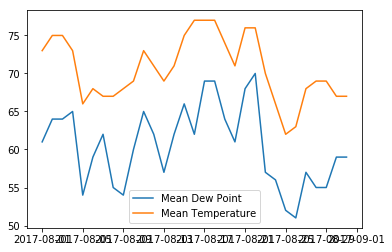

In [3]:
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df = pd.read_csv('http://data.cs1656.org/KPIT_Aug17.csv',\
                       sep=',', engine='python', parse_dates=['EST'])
p1 = plt.plot(df['EST'],df['MeanDew PointF'])
p2 = plt.plot(df['EST'],df['Mean TemperatureF'])
plt.legend([p1[0],p2[0]], ['Mean Dew Point', 'Mean Temperature'])

plt.show()

--- 
Add your code below this line

---
### Task 1

In this task you will need to access historical bike rental data for 2019 from HealthyRidePGH and summarize the rental data.

### Task 1.1

In [165]:
data = pd.concat([pd.read_csv(f) for f in glob.glob('HealthyRideRentals2019-*.csv')], ignore_index = True)

# station id | date (individual day) | fromCNT | toCNT | rebalCNT 

def getDate(x):
    x = x.split()
    date = pd.Timestamp(x[0])
    return date.date()

def getDateNotTime(x):
    return x.date()

def convert(x):
    date = pd.Timestamp(x)
    return date

def getMonth(x):
    return x.month

def getDay(x):
    return x.day

def checkRebal(x):
    check_back = x.name

    if check_back != 0: 
        prev = rebal.iloc[check_back-1]
        if x['Bikeid'] == prev['Bikeid'] and x['From station id'] != prev['To station id']:
            return True

    return False

rebal = data[['Trip id', 'Starttime', 'Bikeid', 'From station id', 'To station id']].copy()
rebal = rebal.fillna(0)
rebal['From Date'] = rebal['Starttime'].apply(convert)
rebal = rebal.sort_values(by=['Bikeid', 'From Date'])
rebal = rebal[rebal.groupby(['Bikeid'])['Bikeid'].transform('size') > 1]

rebal = rebal.reset_index(drop=True)

rebal['rebal'] = rebal.apply(checkRebal, axis=1)
# rebal.head(20)

data['From Date'] = data['Starttime'].apply(getDate)
data['To Date'] = data['Stoptime'].apply(getDate)

data_small = data[['From Date','From station id', 'Trip id', 'Bikeid', 'To station id', 'To Date']].copy()

from_data = data_small[['From Date','From station id']].copy()
from_data = from_data.copy()
to_data = data_small[['To Date', 'To station id']].copy()
to_data = to_data.copy()
rebal_data = rebal[['From Date', 'From station id', 'rebal']].copy()
rebal_data = rebal_data.copy()


from_data['Direction'] = 'fromCNT'
from_data.columns = ['Date','Station ID', 'Direction']

to_data['Direction'] = 'toCNT'
to_data.columns = ['Date','Station ID', 'Direction']

rebal_data.columns = ['Date','Station ID', 'Direction']

indexNames = rebal_data[rebal_data['Direction'] == False].index
rebal_data.drop(indexNames , inplace=True)
rebal_data['Date'] = rebal_data['Date'].apply(getDateNotTime)
rebal_data['Direction'] = 'rebalCNT'

seperated = from_data.append(to_data, ignore_index = True)
seperated = seperated.append(rebal_data, ignore_index = True)

seperated = seperated.sort_values('Station ID')

cross = pd.crosstab(seperated["Date"], [seperated["Station ID"], seperated['Direction']],dropna=False, margins=False, colnames=['Station ID', 'Metric'])
cross = cross.sort_values('Date')
cross.head(20)


Station ID 0.0                    666.0                  1000.0            \
Metric     fromCNT rebalCNT toCNT fromCNT rebalCNT toCNT fromCNT rebalCNT   
Date                                                                        
2019-01-01       0        0     0       0        0     0       4        0   
2019-01-02       0        0     0       0        0     0       2        0   
2019-01-03       0        0     0       0        0     0       0        0   
2019-01-04       0        0     0       0        0     0       2        0   
2019-01-05       0        0     0       0        0     0       5        0   
2019-01-06       0        0     0       0        0     0       1        0   
2019-01-07       0        0     0       0        0     0       2        0   
2019-01-08       0        0     0       0        0     0       2        0   
2019-01-09       0        0     0       0        0     0       2        0   
2019-01-10       0        0     0       0        0     0       1        0   
2019-01-11       0        0     0       0        0     0       1        0   
2019-01-12       0        0     0       0        0     0       0        0   
2019-01-13       0        0     0       0        0     0       0        0   
2019-01-14       0        0     0       0        0     0       0        0   
2019-01-15       0        0     0       0        0     0       3        0   
2019-01-16       0        0     0       0        0     0       1        0   
2019-01-17       0        0     0       0        0     0       0        0   
2019-01-18       0        0     0       0        0     0       2        0   
2019-01-19       0        0     0       0        0     0       3        0   
2019-01-20       0        0     0       0        0     0       0        0   

Station ID       1001.0   ... 49881.0 49921.0                49951.0           \
Metric     toCNT fromCNT  ...   toCNT fromCNT rebalCNT toCNT fromCNT rebalCNT   
Date                      ...                                                   
2019-01-01     4       0  ...       0       0        0     0       0        0   
2019-01-02     0       1  ...       0       0        0     0       1        0   
2019-01-03     3       4  ...       0       0        0     0       0        0   
2019-01-04     1       2  ...       0       0        0     0       0        0   
2019-01-05     5       5  ...       0       0        0     0       0        0   
2019-01-06     2       2  ...       0       0        0     0       0        0   
2019-01-07     2       3  ...       0       0        0     0       0        0   
2019-01-08     0       6  ...       0       0        0     0       0        0   
2019-01-09     1       5  ...       0       0        0     0       0        0   
2019-01-10     1       2  ...       0       0        0     0       0        0   
2019-01-11     0       0  ...       0       0        0     0       1        0   
2019-01-12     2       1  ...       0       0        0     0       0        0   
2019-01-13     1       0  ...       0       0        0     0       0        0   
2019-01-14     1       2  ...       0       0        0     0       0        0   
2019-01-15     6       3  ...       0       0        0     0       2        2   
2019-01-16     0       4  ...       0       0        0     0       0        0   
2019-01-17     3       2  ...       0       0        0     0       0        0   
2019-01-18     0       2  ...       0       0        0     0       0        0   
2019-01-19     1       0  ...       0       0        0     0       1        1   
2019-01-20     0       0  ...       0       0        0     0       0        0   

Station ID       90097.0                 
Metric     toCNT fromCNT rebalCNT toCNT  
Date                                     
2019-01-01     0       0        0     0  
2019-01-02     0       0        0     0  
2019-01-03     0       0        0     0  
2019-01-04     1       0        0     0  
2019-01-05     0       0        0     0  
2019-01-06     0       0    

### Task 1.2

In [166]:
monthly = seperated.copy()
monthly['Date'] = monthly['Date'].apply(getMonth)
monthly = pd.crosstab(monthly["Date"], [monthly["Station ID"], monthly['Direction']],dropna=False, margins=False, colnames=['Station ID', 'Metric'])
monthly.head(20)

Station ID 0.0                    666.0                  1000.0            \
Metric     fromCNT rebalCNT toCNT fromCNT rebalCNT toCNT fromCNT rebalCNT   
Date                                                                        
1                0        0     0       0        0     0      35        1   
2                0        0     0       0        0     0      51       11   
3                0        0     0       0        0     0     132       11   
4                0       59     0       0        0     0     392       11   
5                0       70     0       0        0     0     601       37   
6                0       86     0       0        0     0     666       43   
7                0       93     0       1        1     0     672       31   
8                0       83     0       2        2     0     586       19   
9                0       50     0       0        0     0     522       21   
10               0        0     0       0        0     0       0        0   

Station ID       1001.0   ... 49881.0 49921.0                49951.0           \
Metric     toCNT fromCNT  ...   toCNT fromCNT rebalCNT toCNT fromCNT rebalCNT   
Date                      ...                                                   
1             43      59  ...       0       0        0     0       5        3   
2             58      61  ...       0       6        4     3       7        1   
3            174     117  ...      12      21        5    15      19        5   
4            426     276  ...      26      31        8    27      59       17   
5            659     429  ...      36      63       14    58      92       17   
6            722     498  ...      53      49       17    35      84       26   
7            692     552  ...      42     101       21   104      92       10   
8            640     470  ...      38     107       25    96     133        9   
9            563     415  ...      43     106       14   114     118        8   
10             2       0  ...       0       0        0     0       0        0   

Station ID       90097.0                 
Metric     toCNT fromCNT rebalCNT toCNT  
Date                                     
1              7       0        0     0  
2              7       0        0     0  
3             22       0        0     0  
4             55       0        0     0  
5             94       0        0     0  
6             65       0        0     0  
7            100       2        0     2  
8            143       0        0     0  
9            132       0        0     0  
10             2       0        0     0  

[10 rows x 360 columns]

---
### Task 2

In this task you will need to create graphs to show the popularity of the different rental stations, given filter conditions.

In [167]:
# FILTER VARIABLES -- feel free to edit the values, but the names of the variables must remain 
#                     as they are and should be used by your code accordingly from this point on

filter_month = 9
filter_stationID = 1046


### Task 2.1

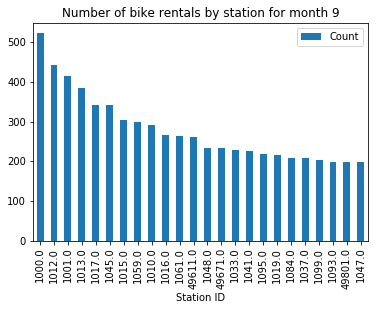

In [168]:
from_month = data_small[['From Date','From station id']].copy()
from_month = from_month.copy()


from_month.columns = ['Date','Station ID']
from_month = from_month.sort_values('Station ID')

from_month['Date'] = from_month['Date'].apply(getMonth)

from_month = from_month.loc[from_month['Date'] == filter_month]
from_month = from_month['Station ID'].groupby([from_month['Station ID']]).count()
from_month = from_month.sort_values(ascending=False)
keys = from_month.keys()
counts = from_month.tolist()


df = pd.DataFrame({'Station ID':keys[0:24], 'Count':counts[0:24]})
ti = 'Number of bike rentals by station for month ' + str(filter_month)
ax = df.plot.bar(x='Station ID', y='Count', title=ti)


### Task 2.2

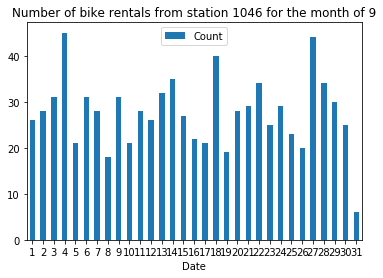

In [169]:
from_station = data_small[['From Date','From station id']].copy()
from_station = from_station.copy()

from_station.columns = ['Date','Station ID']
from_station['Date'] = from_station['Date'].apply(getDay)
from_station = from_station.sort_values('Date')

from_station = from_station.loc[from_station['Station ID'] == filter_stationID]
from_station = from_station['Date'].groupby([from_station['Date']]).count()
keys = from_station.keys()
counts = from_station.tolist()

df = pd.DataFrame({'Date':keys, 'Count':counts})
ti = 'Number of bike rentals from station ' + str(filter_stationID) + ' for the month of ' + str(filter_month)
ax = df.plot.bar(x='Date', y='Count', rot=0, title=ti)

### Task 2.3

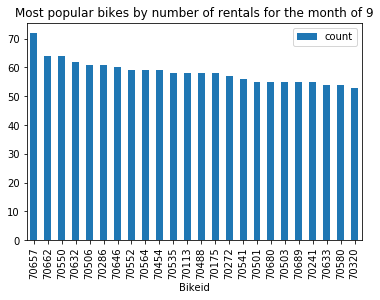

In [170]:
bike_count = data_small[['From Date','Bikeid']].copy()
bike_count = bike_count.copy()

bike_count.columns = ['Date','Bikeid']
# bike_count['Date'] = bike_count['Date'].apply(getDay)
bike_count['Date'] = bike_count['Date'].apply(getMonth)

bike_count = bike_count.loc[bike_count['Date'] == filter_month]
bike_count = bike_count.groupby(['Bikeid'])['Bikeid'].count()
bike_count = bike_count.sort_values(ascending=False)

keys = bike_count.keys()
counts = bike_count.tolist()

df = pd.DataFrame({'Bikeid':keys[0:24], 'count':counts[0:24]})
ti = 'Most popular bikes by number of rentals for the month of ' + str(filter_month)
ax = df.plot.bar(x='Bikeid', y='count', title=ti)

# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

---
### Task 3

In this task you will create graphs to show the rebalancing issue.

### Task 3.1

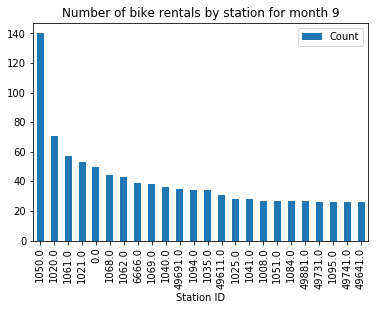

In [182]:
rebal_month = rebal[['From Date', 'From station id', 'rebal']].copy()
rebal_month = rebal_month.copy()

inames = rebal_month[rebal_month['rebal'] == False].index
rebal_month.drop(inames , inplace=True)
rebal_month['From Date'] = rebal_month['From Date'].apply(getDateNotTime)

rebal_month = rebal_month.drop(['rebal'], axis=1)

rebal_month.columns = ['Date','Station ID']
rebal_month = rebal_month.sort_values('Station ID')

rebal_month['Date'] = rebal_month['Date'].apply(getMonth)

rebal_month = rebal_month.loc[rebal_month['Date'] == filter_month]
rebal_month = rebal_month['Station ID'].groupby([rebal_month['Station ID']]).count()
rebal_month = rebal_month.sort_values(ascending=False)
keys = rebal_month.keys()
counts = rebal_month.tolist()

df = pd.DataFrame({'Station ID':keys[0:24], 'Count':counts[0:24]})
ti = 'Number of bike rentals by station for month ' + str(filter_month)
ax = df.plot.bar(x='Station ID', y='Count', title=ti)




### Task 3.2

---
### Task 4

In this task you will cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.

### Task 4.1

### Task 4.2

### Task 4.3